In [1]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import numpy as np
from datetime import timedelta, datetime
import time
import networkx as nx
import matplotlib.pyplot as plt
import folium
import warnings
import sys

warnings.filterwarnings('ignore')

print("Geopandas has version {}".format(gpd.__version__))
print("Movingpandas has version {}".format(mpd.__version__))

Geopandas has version 0.13.2
Movingpandas has version 0.17.1


In [4]:
eval_df = pd.read_csv('../models/RoutePredictions.csv')
eval_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   42 non-null     object 
 1   Creation Time        42 non-null     object 
 2   Tags                 42 non-null     object 
 3   network_name         41 non-null     object 
 4   Task                 41 non-null     object 
 5   Model                41 non-null     object 
 6   MOGen_max_order      41 non-null     float64
 7   MOGen_n_walks        41 non-null     float64
 8   n_start_nodes        41 non-null     float64
 9   MOGen_training_mode  41 non-null     object 
 10  training_dates       41 non-null     object 
 11  n_training_paths     41 non-null     float64
 12  eval_mode            41 non-null     object 
 13  failure_rate         41 non-null     float64
 14  mean_abs_err         41 non-null     float64
 15  median_abs_err       41 non-null     float

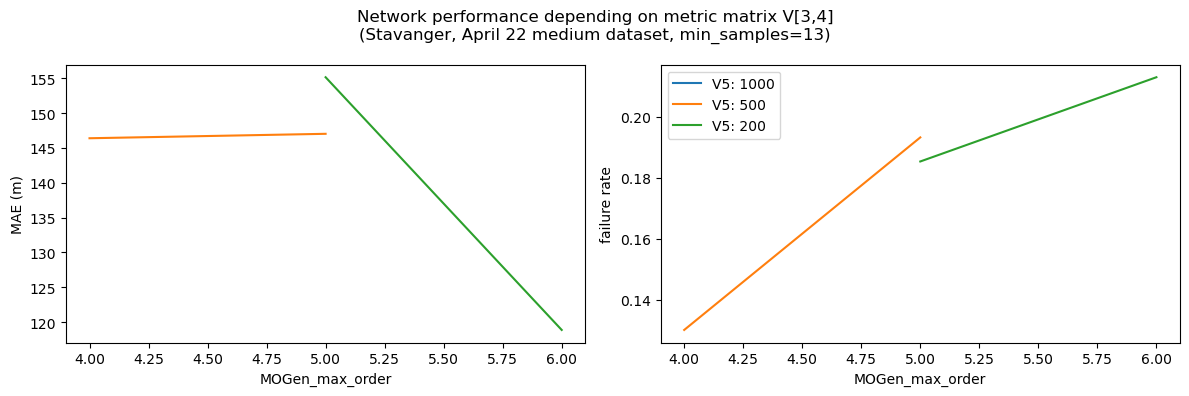

In [10]:
# DEPENDENCE: max order
eval_df.sort_values(by='MOGen_max_order', inplace=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Set the figure size

# Plot on the first axis (axes[0])
axes[0].set_xlabel('MOGen_max_order')
axes[0].set_ylabel('MAE (m)')
axes[0].tick_params(axis='y')

# Plot on the second axis (axes[1])
axes[1].set_xlabel('MOGen_max_order')  # Added x-label for the second plot
axes[1].set_ylabel('failure rate') 
axes[1].tick_params(axis='y')

for val in [1000, 500, 200]:
    filter = ((eval_df['n_start_nodes'] == 4) & (eval_df['MOGen_training_mode'] == 'partial') & (eval_df['MOGen_n_walks'] == val) )
    x = eval_df[filter]['MOGen_max_order']
    y1 = eval_df[filter]['mean_abs_err']
    y2 = eval_df[filter]['failure_rate']
    axes[0].plot(x, y1)
    axes[1].plot(x, y2)

# add legend
legend_labels = [f'V5: {val}' for val in ['1000', '500', '200']]
plt.legend(legend_labels)

# Add title
fig.suptitle('Network performance depending on metric matrix V[3,4]\n(Stavanger, April 22 medium dataset, min_samples=13)')

fig.tight_layout()  # Adjust layout
plt.savefig('V34.png')
plt.show()